In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec20_updated.csv")

In [4]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [5]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [8]:
# columns that have missing values with count of that 
rows = data.shape[0]
missing = rows - data.count()
missing.sort_values(ascending = False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

In [9]:
# calculating missing percentages
missing_percentages = missing/len(data)
missing_percentages
#sort out the ones with zeroes
missing_percentages[missing_percentages != 0].sort_values(ascending = False)

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Nautical_Twilight        0.000055
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
City                     0.000055
Astronomical_Twilight    0.000055
dtype: float64

Text(0, 0.5, 'Missing values fraction')

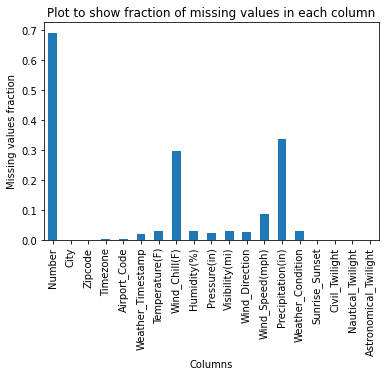

In [10]:
# plot to show the missing percentages
plt.figure(figsize = (6,4))
ax = missing_percentages[missing_percentages != 0].plot.bar()
plt.title('Plot to show fraction of missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Missing values fraction')

#### The columns ‘Number’, ‘Precipitation(in)’ and ‘Wind_Chill(F)’ have the most missing values (40–60% of the data). It is wise to  remove the columns altogether. Because the data contins only one country it is better to remove the Country column too. 

In [11]:
# removing certain columns with more than 50% missing values
data.drop(['Number','Wind_Chill(F)','Precipitation(in)','Country','Description'], axis=1,inplace=True)

In [12]:
#checking if the data has duplicates or not with refernce to the ID assigned to each accident.
data.duplicated('ID').value_counts()

False    1516064
dtype: int64

## Cleaning and Dealing the missing values in all the columns that have missing values

### Column 1 : Wind_Speed(mph)

In [13]:
data['Wind_Speed(mph)'].isna().value_counts()

False    1387202
True      128862
Name: Wind_Speed(mph), dtype: int64

In [14]:
w_m = data['Wind_Speed(mph)'].mean()
w_md = data['Wind_Speed(mph)'].median()
w_max = data['Wind_Speed(mph)'].max()
w_min = data['Wind_Speed(mph)'].min()
w_mo = data['Wind_Speed(mph)'].mode()[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot for Wind Speed')

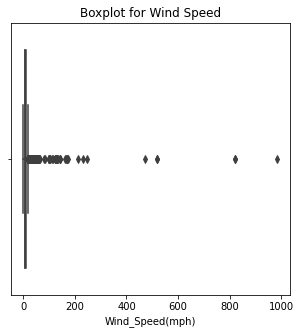

In [15]:
fig,ax = plt.subplots(figsize = (5,5))
ax = sns.boxplot(data['Wind_Speed(mph)'])
plt.title('Boxplot for Wind Speed')


In [16]:
data['Wind_Speed(mph)'].value_counts()

0.0      202877
3.0       98509
5.0       96985
6.0       90336
7.0       83055
          ...  
53.0          1
54.0          1
55.0          1
984.0         1
161.0         1
Name: Wind_Speed(mph), Length: 121, dtype: int64

In [17]:
wind_parms = [w_m,w_md,w_max,w_min,w_mo]
wind_parms

[7.63081245557609, 7.0, 984.0, 0.0, 0.0]

#### Because there are more number of outliers in the data for the column Wind_Speed(mph) , We are replacing the missing values with the median of the data. 

In [18]:
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(data['Wind_Speed(mph)'].median())

In [19]:
data['Wind_Speed(mph)'].isna().value_counts()

False    1516064
Name: Wind_Speed(mph), dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot of Wind Speed')

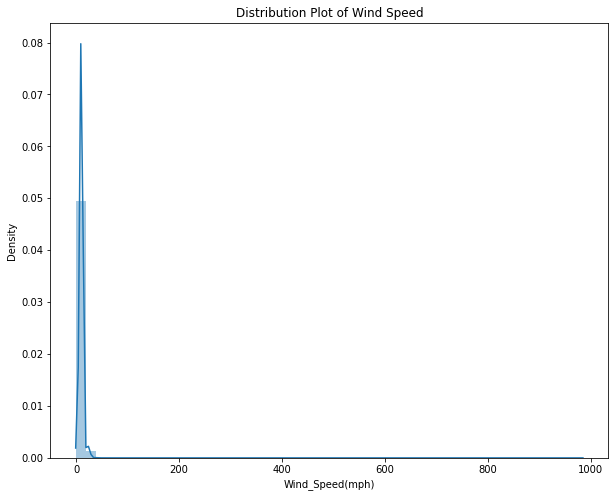

In [20]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.distplot(data['Wind_Speed(mph)'])
plt.title('Distribution Plot of Wind Speed')

### Column 2: Humidity(%)

In [21]:
h_m = data['Humidity(%)'].mean()
h_md = data['Humidity(%)'].median()
h_max = data['Humidity(%)'].max()
h_min = data['Humidity(%)'].min()
h_mo = data['Humidity(%)'].mode()[0]

In [22]:
hum_parms = [h_m,h_md,h_max,h_min,h_mo]
hum_parms

[64.65960130698954, 68.0, 100.0, 1.0, 93.0]

In [23]:
data['Humidity(%)'].value_counts()

93.0     58126
100.0    53509
89.0     32328
87.0     31189
90.0     30850
         ...  
5.0       1246
4.0        724
3.0        246
2.0         88
1.0         11
Name: Humidity(%), Length: 100, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot of Humidity')

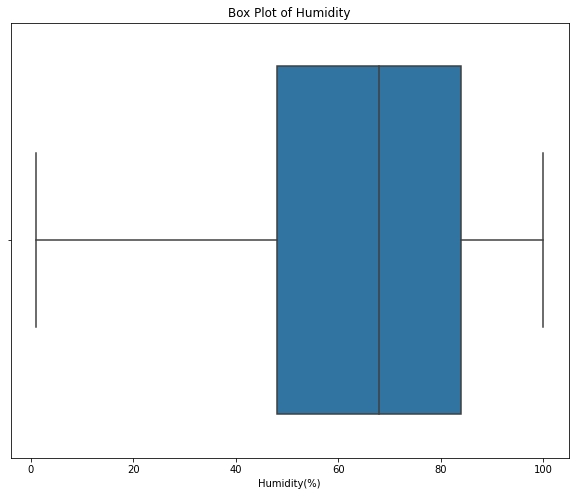

In [24]:
#Checking for Outliers
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data['Humidity(%)'])
plt.title('Box Plot of Humidity')

### As there are no outliers, we are replacing the missing values we will replace them with the mean of the data.

In [25]:
data['Humidity(%)'] = data['Humidity(%)'].fillna(data['Humidity(%)'].mean())

In [26]:
data['Humidity(%)'].isna().sum().sum()

0

### Column 3: Visibility

In [27]:
data['Visibility(mi)'].isna().value_counts()

False    1471853
True       44211
Name: Visibility(mi), dtype: int64

In [28]:
v_m = data['Visibility(mi)'].mean()
v_md = data['Visibility(mi)'].median()
v_max = data['Visibility(mi)'].max()
v_min = data['Visibility(mi)'].min()
v_mo = data['Visibility(mi)'].mode()[0]

In [29]:
vis_parms = [v_m,v_md,v_max,v_min,v_mo]
vis_parms

[9.13175505298399, 10.0, 140.0, 0.0, 10.0]

In [30]:

data['Visibility(mi)'].value_counts()

10.0     1178150
7.0        44433
9.0        37704
8.0        30265
5.0        28883
          ...   
6.2            1
63.0           1
140.0          1
0.7            1
54.0           1
Name: Visibility(mi), Length: 74, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BoxPlot for Visibility')

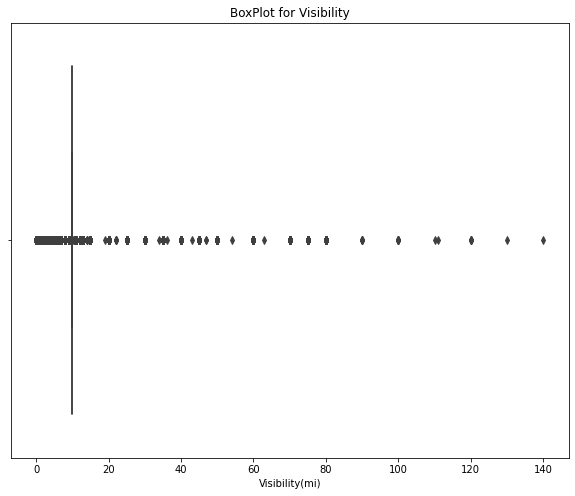

In [31]:

#Checking for Outliers
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data['Visibility(mi)'])
plt.title('BoxPlot for Visibility')

### As there are no outliers, we are replacing the missing values we will replace them with the median of the data.

In [32]:
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(data['Visibility(mi)'].median())

In [33]:
data['Visibility(mi)'].isna().sum().sum()

0

### Column4: Temperature(F)

In [34]:
data['Temperature(F)'].isna().value_counts()

False    1473031
True       43033
Name: Temperature(F), dtype: int64

In [35]:
t_m = data['Temperature(F)'].mean()
t_md = data['Temperature(F)'].median()
t_max = data['Temperature(F)'].max()
t_min = data['Temperature(F)'].min()
t_mo = data['Temperature(F)'].mode()[0]

In [36]:
tem_parms = [t_m,t_md,t_max,t_min,t_mo]
tem_parms

[59.5845967939567, 61.0, 170.6, -89.0, 59.0]

In [37]:
data['Temperature(F)'].value_counts()

 59.0     32387
 63.0     31595
 68.0     30898
 57.0     30862
 64.0     30778
          ...  
-10.7         1
 116.1        1
-1.5          1
-4.5          1
-22.4         1
Name: Temperature(F), Length: 775, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box PLot of Temperature')

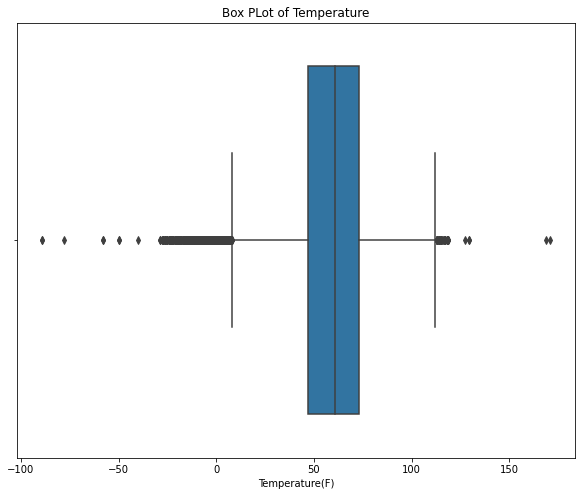

In [38]:
#Checking for Outliers
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data['Temperature(F)'])
plt.title('Box PLot of Temperature')

### As there are no outliers, we are replacing the missing values we will replace them with the median of the data.

In [39]:
data['Temperature(F)'] = data['Temperature(F)'].fillna(data['Temperature(F)'].median())

In [40]:
data['Temperature(F)'].isna().sum().sum()

0

### Column 5: Wind_Direction

In [41]:
data['Wind_Direction'].isna().value_counts()

False    1474206
True       41858
Name: Wind_Direction, dtype: int64

In [42]:
data['Wind_Direction'].value_counts()

CALM        202870
Calm         79192
WNW          77743
NW           75810
W            72059
SSW          69901
WSW          68504
NNW          68014
S            67543
SW           65626
SSE          65058
SE           54770
N            53718
E            52435
ESE          51295
ENE          51257
NE           48355
NNE          46509
West         40611
South        40596
VAR          39670
North        35568
East         24064
Variable     23038
Name: Wind_Direction, dtype: int64

### To replace the duplicate values we need to replace and eliminate them. For Example, Calm and CALM are the same. 

In [43]:
data['Wind_Direction'] = data['Wind_Direction'].str.replace('Calm' , 'CALM') 
data['Wind_Direction'] = data['Wind_Direction'].str.replace('North' , 'N')
data['Wind_Direction'] = data['Wind_Direction'].str.replace('South' , 'S')
data['Wind_Direction'] = data['Wind_Direction'].str.replace('West' , 'W')
data['Wind_Direction'] = data['Wind_Direction'].str.replace('East' , 'E')
data['Wind_Direction'] = data['Wind_Direction'].str.replace('Variable' , 'VAR')

In [44]:
w_C=(data['Wind_Direction'].value_counts()/len(data['Wind_Direction'])*missing['Wind_Direction']).round(0)
w_c_val=w_C.values
w_c_idx = w_C.index
w_C

CALM    7788.0
W       3111.0
S       2986.0
N       2465.0
WNW     2146.0
E       2112.0
NW      2093.0
SSW     1930.0
WSW     1891.0
NNW     1878.0
SW      1812.0
SSE     1796.0
VAR     1731.0
SE      1512.0
ESE     1416.0
ENE     1415.0
NE      1335.0
NNE     1284.0
Name: Wind_Direction, dtype: float64

In [45]:
w_c_val = w_c_val.astype(int)

In [46]:
r = w_C.shape[0]
for i in range(0,r):
    data['Wind_Direction']=data['Wind_Direction'].fillna(w_c_idx[i], limit = w_c_val[i])
data['Wind_Direction'].value_counts()

CALM    289850
W       115781
S       111125
N        91751
WNW      79889
E        78611
NW       77903
SSW      71831
WSW      70395
NNW      69892
SW       67438
SSE      66854
VAR      64439
SE       56282
ESE      52711
ENE      52672
NE       49690
NNE      47793
Name: Wind_Direction, dtype: int64

In [47]:
data['Wind_Direction'].isna().sum().sum()

1157

In [48]:
miss = data['Wind_Direction'].isna().sum().sum()

In [49]:
w_C2=(data['Wind_Direction'].value_counts()/len(data['Wind_Direction'])*miss).round(0)
w_c_val2=w_C2.values
w_c_idx2= w_C2.index
w_C2

CALM    221.0
W        88.0
S        85.0
N        70.0
WNW      61.0
E        60.0
NW       59.0
SSW      55.0
WSW      54.0
NNW      53.0
SW       51.0
SSE      51.0
VAR      49.0
SE       43.0
ESE      40.0
ENE      40.0
NE       38.0
NNE      36.0
Name: Wind_Direction, dtype: float64

In [50]:
w_c_val2 = w_c_val2.astype(int)

In [51]:
r = w_C2.shape[0]
for i in range(0,r):
    data['Wind_Direction']=data['Wind_Direction'].fillna(w_c_idx2[i], limit = w_c_val2[i])
data['Wind_Direction'].value_counts()

CALM    290071
W       115869
S       111210
N        91821
WNW      79950
E        78671
NW       77962
SSW      71886
WSW      70449
NNW      69945
SW       67489
SSE      66905
VAR      64488
SE       56325
ESE      52751
ENE      52712
NE       49728
NNE      47829
Name: Wind_Direction, dtype: int64

In [52]:
data['Wind_Direction'].isna().sum().sum()

3

In [53]:
data['Wind_Direction']=data['Wind_Direction'].fillna('CALM')
data['Wind_Direction'].isna().sum().sum()

0

### Column 6: Weather_Condition

In [54]:
data['Weather_Condition'] = data['Weather_Condition'].str.replace('Rain Showers' , 'Rain Shower') 
data['Weather_Condition'] = data['Weather_Condition'].str.replace('T-Storm' , 'Thunderstorms')
data['Weather_Condition'] = data['Weather_Condition'].str.replace('T-Storm / Windy' , 'Thunderstorms / Windy')
data['Weather_Condition'] = data['Weather_Condition'].str.replace('Heavy T-Storm' , 'Heavy Thunderstorms')
data['Weather_Condition'] = data['Weather_Condition'].str.replace('Heavy T-Storm / Windy' , 'Heavy Thunderstorms / Windy')

In [55]:
we_Co=(data['Weather_Condition'].value_counts()/len(data['Weather_Condition'])*missing['Weather_Condition']).round(0)
we_Co = we_Co.astype(int)
we_Co = we_Co.astype(str)
we_Co = we_Co.str.replace('0' , '1') 
we_Co = we_Co.astype(int)
we_co_val=we_Co.values
we_co_idx = we_Co.index
we_Co

Fair                                   13515
Mostly Cloudy                           5621
Clear                                   5231
Cloudy                                  4682
Partly Cloudy                           3864
                                       ...  
Hail                                       1
Heavy Thunderstorms with Small Hail        1
Light Fog                                  1
Drifting Snow                              1
Mist / Windy                               1
Name: Weather_Condition, Length: 113, dtype: int64

In [56]:
we_co_val = we_co_val.astype(int)
rwc = we_Co.shape[0]
for i in range(0,rwc):
    data['Weather_Condition']=data['Weather_Condition'].fillna(we_co_idx[i], limit = we_co_val[i])
data['Weather_Condition'].value_counts()

Fair                                   478767
Mostly Cloudy                          199216
Clear                                  185454
Cloudy                                 165973
Partly Cloudy                          136966
                                        ...  
Hail                                        2
Heavy Thunderstorms with Small Hail         2
Light Fog                                   2
Drifting Snow                               2
Mist / Windy                                2
Name: Weather_Condition, Length: 113, dtype: int64

In [57]:
data['Weather_Condition'].isna().sum().sum()

1183

In [58]:
missed_data = data['Weather_Condition'].isna().sum().sum()

In [59]:
we_Co1=(data['Weather_Condition'].value_counts()/len(data['Weather_Condition'])*missed_data).round(0)
we_Co1 = we_Co1.astype(int)
we_Co1 = we_Co1.astype(str)
we_Co1 = we_Co1.str.replace('0' , '1') 
we_Co1 = we_Co1.astype(int)
we_co_val1=we_Co1.values
we_co_idx1 = we_Co1.index
we_Co1

Fair                                   374
Mostly Cloudy                          155
Clear                                  145
Cloudy                                 131
Partly Cloudy                          117
                                      ... 
Hail                                     1
Heavy Thunderstorms with Small Hail      1
Light Fog                                1
Drifting Snow                            1
Mist / Windy                             1
Name: Weather_Condition, Length: 113, dtype: int64

In [60]:
we_co_val1 = we_co_val1.astype(int)
rwc1 = we_Co1.shape[0]
for i in range(0,rwc1):
    data['Weather_Condition']=data['Weather_Condition'].fillna(we_co_idx1[i], limit = we_co_val1[i])
data['Weather_Condition'].value_counts()

Fair                                   479141
Mostly Cloudy                          199371
Clear                                  185599
Cloudy                                 166104
Partly Cloudy                          137083
                                        ...  
Hail                                        2
Heavy Thunderstorms with Small Hail         2
Light Fog                                   2
Drifting Snow                               2
Mist / Windy                                2
Name: Weather_Condition, Length: 113, dtype: int64

In [61]:
data['Weather_Condition'].isna().sum().sum()

0

### Column 7 : Pressure(in)

In [62]:
data['Pressure(in)'].isna().value_counts()

False    1479790
True       36274
Name: Pressure(in), dtype: int64

In [63]:
p_m = data['Pressure(in)'].mean()
p_md = data['Pressure(in)'].median()
p_max = data['Pressure(in)'].max()
p_min = data['Pressure(in)'].min()
p_mo = data['Pressure(in)'].mode()[0]

In [64]:
press_parms = [p_m,p_md,p_max,p_min,p_mo]
press_parms

[29.554954405696044, 29.88, 58.04, 0.0, 29.96]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BoxPlot for Pressure')

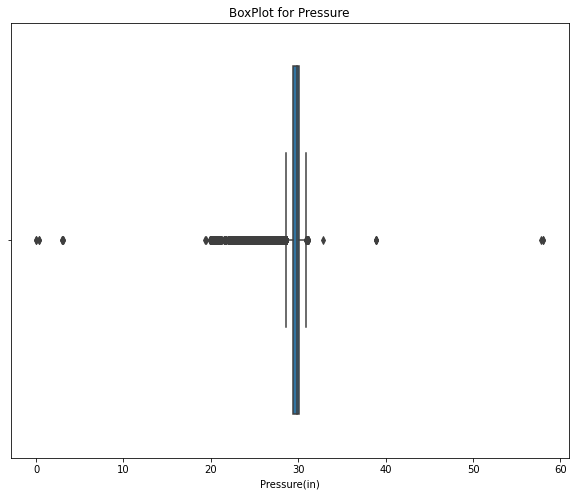

In [65]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data['Pressure(in)'])
plt.title('BoxPlot for Pressure')

In [66]:
data['Pressure(in)'].value_counts()

29.96    25265
29.94    24750
29.99    24603
30.01    24081
29.91    23258
         ...  
31.10        1
22.28        1
20.83        1
22.40        1
0.00         1
Name: Pressure(in), Length: 1007, dtype: int64

In [67]:
data['Pressure(in)'] = data['Pressure(in)'].fillna(data['Pressure(in)'].median())

In [68]:
data['Pressure(in)'].isna().sum().sum()

0

### Column 8 : Weather_Timestamp

In [69]:
data['Weather_Timestamp'].isna().value_counts()

False    1485800
True       30264
Name: Weather_Timestamp, dtype: int64

In [70]:
data['Start_Time'].head()

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:15:39
4    2016-02-08 06:51:45
Name: Start_Time, dtype: object

In [71]:
data['Weather_Timestamp'].head()

0    2016-02-08 00:53:00
1    2016-02-08 05:58:00
2    2016-02-08 05:53:00
3    2016-02-08 05:53:00
4    2016-02-08 06:54:00
Name: Weather_Timestamp, dtype: object

In [72]:
data['Weather_Timestamp'] = data['Weather_Timestamp'].fillna(data['Start_Time'])

In [73]:
data['Weather_Timestamp'].isna().sum().sum()

0

### Column 9 : City

In [74]:
temp_city = data[pd.isnull(data['City']) & pd.notnull(data['County'])][['City','County']]
tc = pd.DataFrame(temp_city['City'].isna().groupby(temp_city['County']).value_counts())
tc.rename(columns={'City':'Count'}, inplace=True)
tc.reset_index(inplace=True)
el = []
for c in tc['County']:
    u = data[data['County']== c].groupby('City').County.count()
    u = pd.DataFrame(u)
    u.reset_index(inplace = True)
    ci = u['City'][u['County']==u['County'].max()].to_list()
    el.append(ci)
le = []
for i in range(len(el)):
    le.append(el[i][0])
tc['max_city'] = le 
j = 0 
for i in (tc['County']):
    data['City'][data['County']==i] = data['City'][data['County']==i].fillna(tc['max_city'][j])
    j = j+1 
data['City'].isna().sum().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0

### Timezone

In [75]:
df1 = data.groupby(['County'])['Timezone'].apply(lambda x: x.value_counts().index[0]).reset_index()
ti_ci = data[pd.isnull(data['Timezone']) & pd.notnull(data['County'])][['County','Timezone']]
ti_ci = ti_ci['Timezone'].isna().groupby(ti_ci['County']).value_counts()
ti_ci = pd.DataFrame(ti_ci)
ti_ci.rename(columns={'Timezone':'CountOfMissing'}, inplace = True)
ti_ci.reset_index(inplace = True)
for i in ti_ci['County']:
    j = df1['Timezone'][df1['County']==i].values[0]
    data['Timezone'][data['County']==i] = data['Timezone'][data['County']==i].fillna(j)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [76]:
data['Timezone'].isna().sum().sum()

0

### After understanding the columns and their definitions we have decided to delete certain columns:
1) Airport Code : 
2) Zipcode : As we already have City and County. Further filling zipcode null values in realtion to city and county was not possible as every county and city had multiple zipcodes. And City already had null values. Further our analysis does not require Zipcode as we were mostly linking to City or County level.
3) Astronomical_Twilight: Not necessary for our analysis
4) Nautical_Twilight: Not necessary for our analysis
5) Civil_Twilight: Not necessary for our analysis
6) Sunset_Sunrise: Already fetching hour of day from Start_Date field so not needed for analysis.

In [77]:
data.drop(['Airport_Code','Zipcode','Astronomical_Twilight','Nautical_Twilight','Civil_Twilight'], axis=1, inplace=True)

In [78]:
data.drop('Sunrise_Sunset',axis=1, inplace=True)

### After Data Cleaning- The number of missing values in each column are: 

In [79]:
rows = data.shape[0]
missing = rows - data.count()
missing.sort_values(ascending = False)

Turning_Loop         0
Traffic_Signal       0
Weather_Timestamp    0
Timezone             0
State                0
County               0
City                 0
Side                 0
Street               0
Distance(mi)         0
End_Lng              0
End_Lat              0
Start_Lng            0
Start_Lat            0
End_Time             0
Start_Time           0
Severity             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Junction             0
Traffic_Calming      0
Stop                 0
Station              0
Roundabout           0
Railway              0
No_Exit              0
Give_Way             0
Visibility(mi)       0
Crossing             0
Bump                 0
Amenity              0
Weather_Condition    0
Wind_Speed(mph)      0
Wind_Direction       0
ID                   0
dtype: int64

# Understanding different set of questions in the data

### Exploratory Data Analysis

##### Which state has recorded the highest number of accidents?

Text(0.5, 1.0, 'Fig1. State Vs No of Accidents')

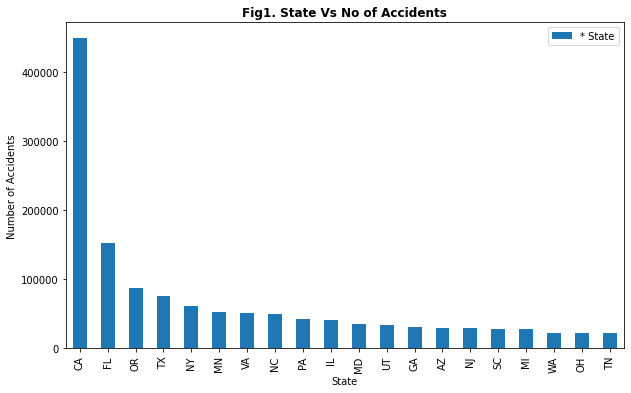

In [80]:
plt.figure(figsize = (10,6))
ax = data.State.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* State'])
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Fig1. State Vs No of Accidents', weight = 'bold')

Observations:
1. The highest number of accidents were recorded in the state of California.
2. California (CA) is the 3rd most largest state of US after Texas (TX) and Alaska (AL)
3. Also California (CA) is the most populated among all, followed by Texas (TX)
4. Alaska (AL) is the largest state but least populated state at 48th rank




##### Which city has recorded the highest number of accidents?

Text(0.5, 1.0, 'Fig 2. City Vs No of Accidents')

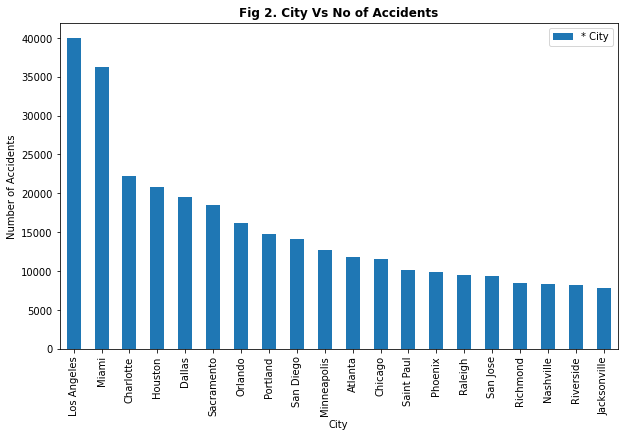

In [81]:
plt.figure(figsize = (10,6))
ax = data.City.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* City'])
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.title('Fig 2. City Vs No of Accidents', weight = 'bold')

There is a lot of presence of cities from California (LA, Sacramento, San Diego, Riverside, Jacksonville), followed by Texas (Houston, Dallas, Austin), Florida (Miami, Orlando), and North Carolina (Charlotte, Raleigh). This is in tandem with the top three states: California, Florida, Texas, and North Carolina.

In [82]:
acc_by_city = data.groupby('City')['City'].count().sort_values(ascending = False)
acc_by_city[:40]

City
Los Angeles        39986
Miami              36233
Charlotte          22203
Houston            20843
Dallas             19497
Sacramento         18431
Orlando            16169
Portland           14805
San Diego          14090
Minneapolis        12653
Atlanta            11854
Chicago            11507
Saint Paul         10084
Phoenix             9934
Raleigh             9516
San Jose            9362
Richmond            8472
Nashville           8381
Riverside           8201
Jacksonville        7815
Salt Lake City      7737
Kansas City         7500
Baton Rouge         7085
Austin              7038
Oakland             6978
Tucson              6908
Denver              6807
San Bernardino      6653
Seattle             6531
New Orleans         6479
Anaheim             6209
Ontario             6151
Fort Lauderdale     6103
Bakersfield         6048
Tampa               5987
Long Beach          5893
Corona              5813
Bronx               5563
Rochester           5396
Detroit             

Text(0.5, 1.0, 'Fig 3. Number of City Vs No of Accidents on logarathmic scale')

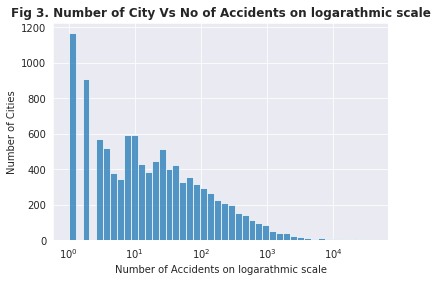

In [83]:
import seaborn as sns
# distribution of cities by the number of accidents
sns.set_style("darkgrid")
#plotting a hitogram with a logarithmic scale
plt.figure(figsize = (6,4))
ax = sns.histplot(acc_by_city, log_scale=True)
plt.xlabel('Number of Accidents on logarathmic scale')
plt.ylabel('Number of Cities')
plt.title('Fig 3. Number of City Vs No of Accidents on logarathmic scale', weight = 'bold')

In [84]:
high_acc_cities = acc_by_city[acc_by_city >= 1000]
low_acc_cities = acc_by_city[acc_by_city < 1000]
per_high_acc_city = len(high_acc_cities)/len(acc_by_city)
per_high_acc_city

0.02355259453880079

2.35% of the total number of cities have an accident number greater than 1000.

Text(0.5, 1.0, 'Fig 4. Number of High Accident Cities Vs No of Accidents on logarathmic scale')

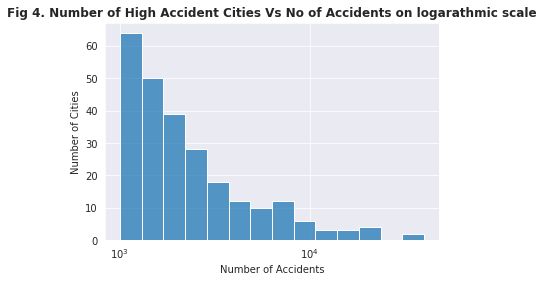

In [85]:
# dist of high acc city
plt.figure(figsize = (6,4))
ax = sns.histplot(high_acc_cities, log_scale = True)
plt.xlabel('Number of Accidents')
plt.ylabel('Number of Cities')
plt.title('Fig 4. Number of High Accident Cities Vs No of Accidents on logarathmic scale', weight = 'bold')

Text(0.5, 1.0, 'Fig 5. Number of low City Vs No of Accidents on logarathmic scale')

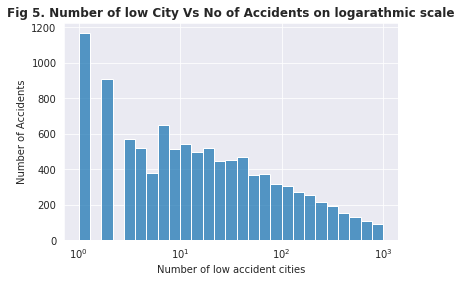

In [86]:
# dist of low acc city
plt.figure(figsize = (6,4))
ax = sns.histplot(low_acc_cities, log_scale = True)
plt.xlabel('Number of low accident cities')
plt.ylabel('Number of Accidents')
plt.title('Fig 5. Number of low City Vs No of Accidents on logarathmic scale', weight='bold')

* Less than 70 cities (out of 10658) reported more than 1000 accidents during the period.
* Over 1000 cities have had just one accident in 4years- needs further investigation.
* The majority of them have witnessed between 10–100 accidents during the period.
* Accidents by cities follow an exponentially decreasing distribution.

# What is the level of severity that has been recorded the most? 

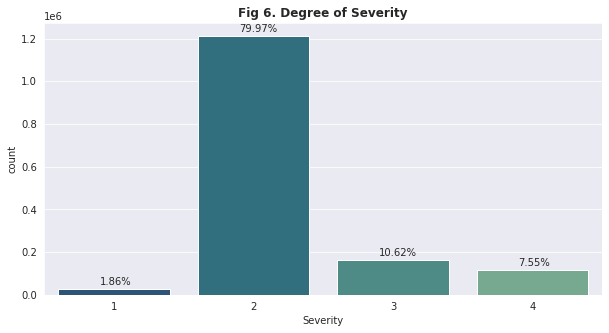

In [87]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Severity", data=data, orient = 'v', palette = "crest_r")
c.set_title("Fig 6. Degree of Severity", weight='bold')
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(data.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

The plot depicts that mostly the accidents had severity equal to 2(average) followed by 3(above average). There are hardly any accidents with very low severity(0 and 1).

# During which weather condition was the number of accidents the highest? 

Text(0.5, 1.0, 'Fig 9. Weather Condition Vs No of Accidents')

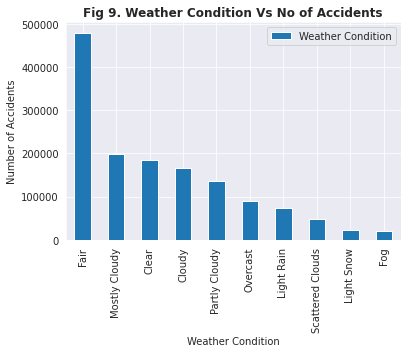

In [88]:
plt.figure(figsize = (6,4))
ax = data.Weather_Condition.value_counts()[:10].plot(kind = 'bar')
ax.legend(['Weather Condition'])
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Fig 9. Weather Condition Vs No of Accidents', weight = 'bold')

The plot depicts that the weather condition for most of the accidents was clear, followed by overcast and mostly cloudy. Overcast and mostly cloudy are reasonable factors for accidents unlike clear, which means that weather conditions also does not play an important role.

# What time of the day are the accidents most likely to occur? 

In [89]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
dt_hour = data['Start_Time'].dt.hour
dt_hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fig 10a. Time of day vs No of accidents')

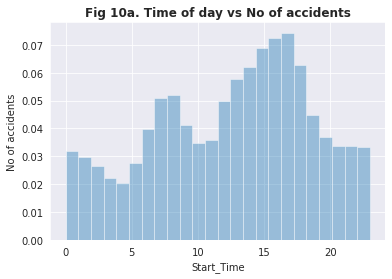

In [90]:
ax = sns.distplot(dt_hour, bins = 24, kde=False, norm_hist=True)
ax.set(xlabel='Start_Time', ylabel='No of accidents')
plt.title('Fig 10a. Time of day vs No of accidents', weight = 'bold')

Text(0.5, 1.0, 'Fig 10b. Time of day vs No of accidents')

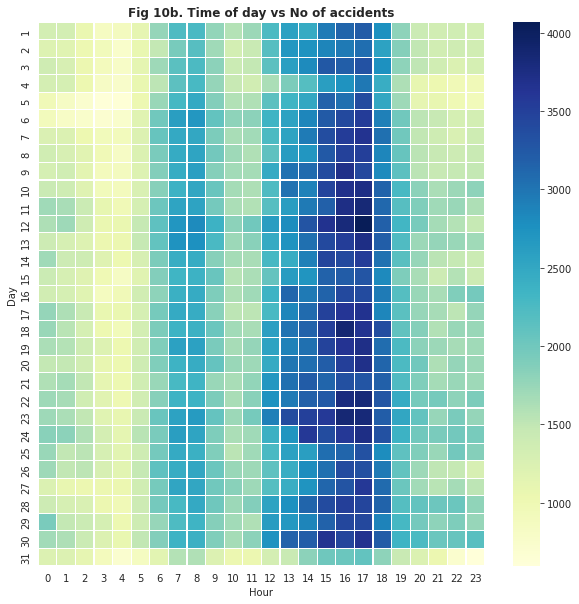

In [91]:
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour
group_hour = data.groupby(["Day","Hour"]).size().unstack()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax = sns.heatmap(group_hour, cmap="YlGnBu",linewidths=0.1)
plt.title('Fig 10b. Time of day vs No of accidents', weight = 'bold')

There are two peaks of time- one in the morning in between 6 am to 9 am and another between 3 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Fig 11. Day of Week vs No of accident')

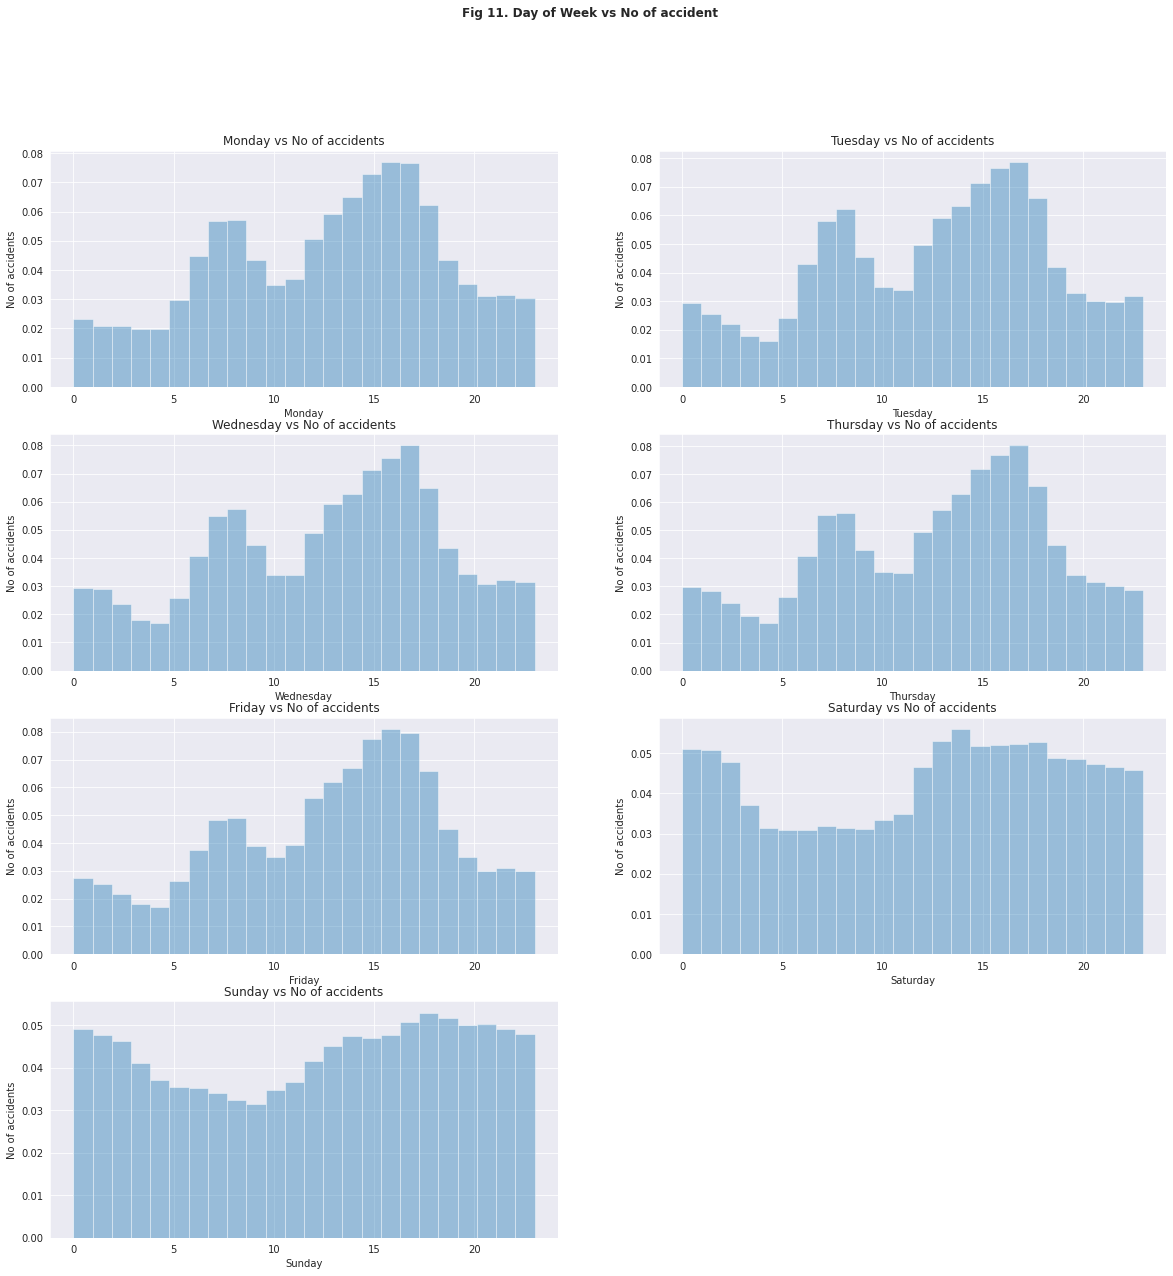

In [92]:
#pull the day of the week from the timestamp format
mon_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 0]
tue_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 1]
wed_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 2]
thurs_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 3]
fri_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 4]
sat_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 5]
sun_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 6]

#plot the distribution

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,2,1)
sns.distplot(mon_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Monday', ylabel='No of accidents')
plt.title('Monday vs No of accidents')

ax = fig.add_subplot(4,2,2)
sns.distplot(tue_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Tuesday', ylabel='No of accidents')
plt.title('Tuesday vs No of accidents')

ax = fig.add_subplot(4,2,3)
sns.distplot(wed_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Wednesday', ylabel='No of accidents')
plt.title('Wednesday vs No of accidents')

ax = fig.add_subplot(4,2,4)
sns.distplot(thurs_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Thursday', ylabel='No of accidents')
plt.title('Thursday vs No of accidents')


ax = fig.add_subplot(4,2,5)
sns.distplot(fri_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Friday', ylabel='No of accidents')
plt.title('Friday vs No of accidents')

ax = fig.add_subplot(4,2,6)
sns.distplot(sat_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Saturday', ylabel='No of accidents')
plt.title('Saturday vs No of accidents')

ax = fig.add_subplot(4,2,7)
sns.distplot(sun_start_time.dt.hour, bins = 24, kde=False, norm_hist=True,)
ax.set(xlabel='Sunday', ylabel='No of accidents')
plt.title('Sunday vs No of accidents')

plt.suptitle('Fig 11. Day of Week vs No of accident', weight ='bold')








While Weekdays follows the general 24-hour pattern- two peaks are coinciding 
with work rush hours; the distribution for weekend (Sunday,Saturday) sees a peak between 10 am and 2 pm. This could be due to people going out for leisurely activities on Sundays.

# What is the monthly distribution of accidents?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fig 12. Monthly vs No of accidents')

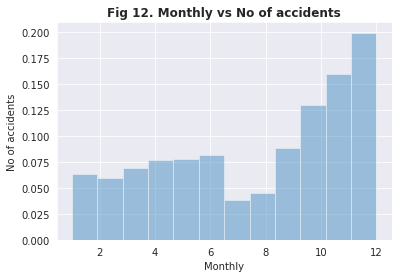

In [93]:
# monthly distribution of accident

ax = sns.distplot(data.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
ax.set(xlabel='Monthly', ylabel='No of accidents')
plt.title('Fig 12. Monthly vs No of accidents', weight = 'bold')

This could possibly be due to summer break and then the new school term around August-September.

# What is the trend of the number of accidents through 2016-2020?

In [94]:
acc_2016 = data[data.Start_Time.dt.year == 2016]
acc_2017 = data[data.Start_Time.dt.year == 2017]
acc_2018 = data[data.Start_Time.dt.year == 2018]
acc_2019 = data[data.Start_Time.dt.year == 2019]
acc_2020 = data[data.Start_Time.dt.year == 2020]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Fig 13. Year Vs No of accidents')

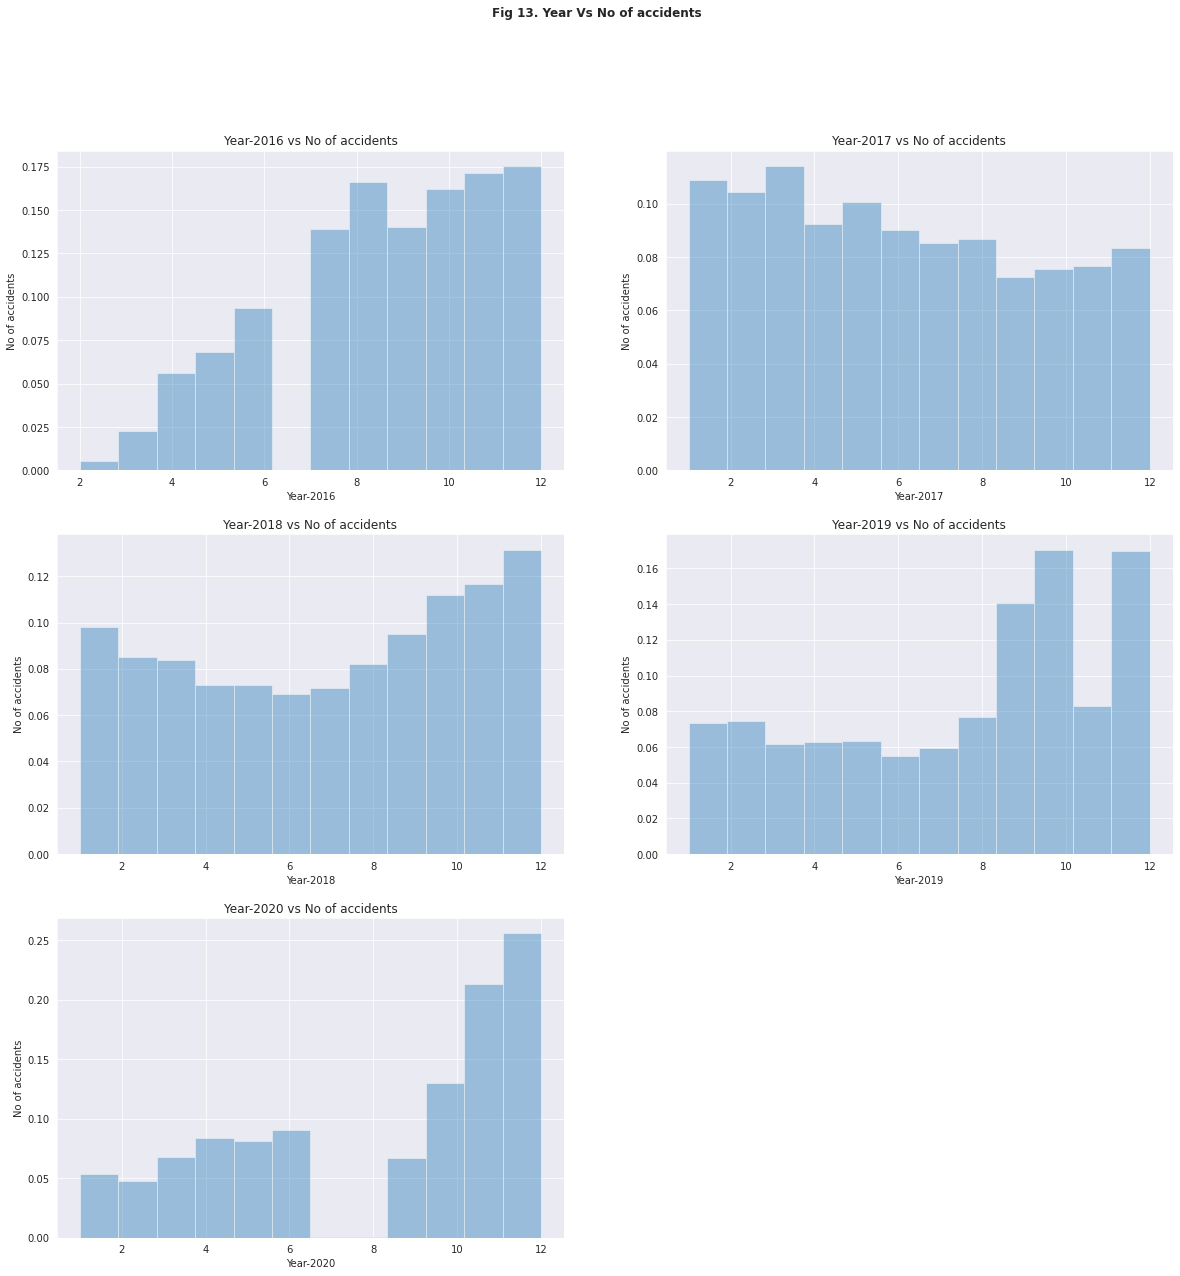

In [95]:
fig = plt.figure(figsize=(20,20))


ax = fig.add_subplot(3,2,1)
sns.distplot(acc_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
ax.set(xlabel='Year-2016', ylabel='No of accidents')
plt.title('Year-2016 vs No of accidents')

ax = fig.add_subplot(3,2,2)
sns.distplot(acc_2017.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
ax.set(xlabel='Year-2017', ylabel='No of accidents')
plt.title('Year-2017 vs No of accidents')

ax = fig.add_subplot(3,2,3)
sns.distplot(acc_2018.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
ax.set(xlabel='Year-2018', ylabel='No of accidents')
plt.title('Year-2018 vs No of accidents')

ax = fig.add_subplot(3,2,4)
sns.distplot(acc_2019.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
ax.set(xlabel='Year-2019', ylabel='No of accidents')
plt.title('Year-2019 vs No of accidents')

ax = fig.add_subplot(3,2,5)
sns.distplot(acc_2020.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
ax.set(xlabel='Year-2020', ylabel='No of accidents')
plt.title('Year-2020 vs No of accidents')

plt.suptitle('Fig 13. Year Vs No of accidents', weight = 'bold')

Clearly, there is data missing for the month of January (data was collected from February 2016) and July.

# Yearly countplot of accidents

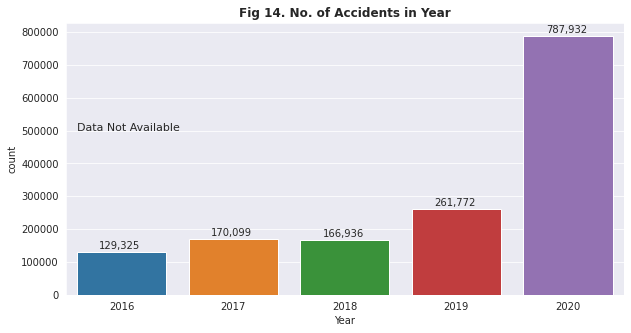

In [96]:
data.Start_Time = pd.to_datetime(data.Start_Time)
data['Year'] = data['Start_Time'].dt.year
data['Weekday'] = data['Start_Time'].dt.weekday



fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=data)
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("Fig 14. No. of Accidents in Year", weight = 'bold')
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()


# Weekday countplot of accidents

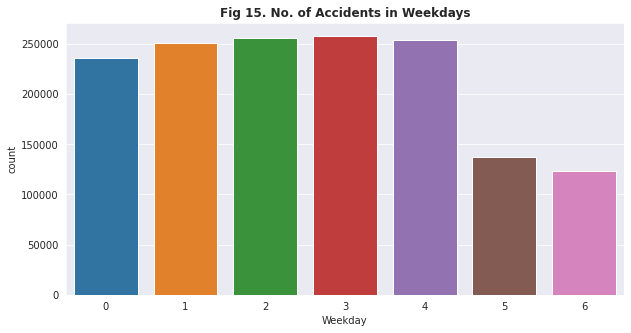

In [97]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=data)
c.set_title("Fig 15. No. of Accidents in Weekdays", weight = 'bold')
plt.show()

Text(0.5, 0, 'Year')

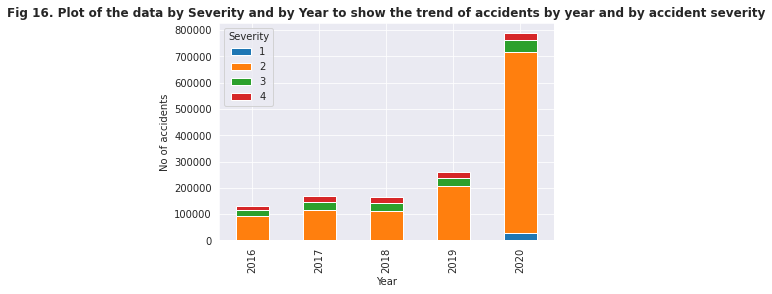

In [98]:
data.groupby(["Year","Severity"]).size().unstack().plot(kind='bar',stacked=True)
plt.title('Fig 16. Plot of the data by Severity and by Year to show the trend of accidents by year and by accident severity', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Year')

From the plot, we can see that:

1.  Severity 2 accidents are increasing year over year in a rapid speed
2. Severity 3 accidents have seen a decrease in 2019 compared to 2018
3. Severity 1 and 4 are relatively flat year over year


# Under each weather condition, which level of severity was recorded to have the highest number of accidents?

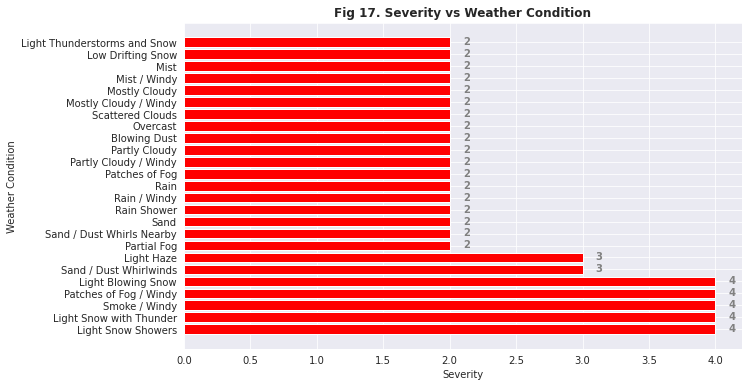

In [99]:
We_Se = data[['Weather_Condition','Severity']].groupby(["Weather_Condition",'Severity']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='Severity').sort_values(by='Severity',ascending=False)
y = We_Se['Weather_Condition'].head(25)
x = We_Se['Severity'].head(25)
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(y, x, color = 'r') 
plt.title('Fig 17. Severity vs Weather Condition', weight = 'bold')
plt.ylabel('Weather Condition')
plt.xlabel('Severity')
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

So it is seen the weather conditions like Snow, smoke and windy has seen high severe accidents. This is inline with logical thinking that such extreme weather conditions are likely to have caused severe accidents

# Analysing Temperature and Severity of Accidents

Text(0.5, 1.0, 'Fig 18. Temperature and Severity')

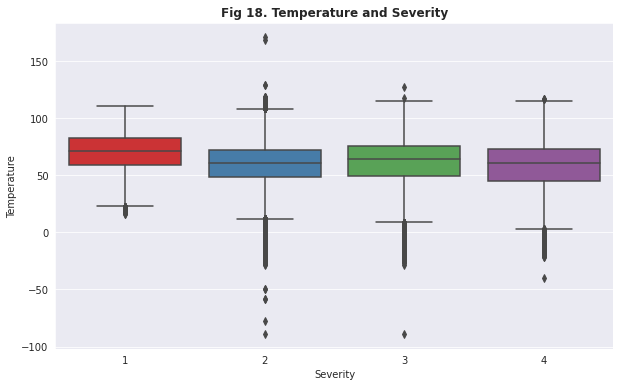

In [100]:
# Boxplot to show if temperature has impact on the severity of the accident, 
# looks like the more severe accident has lower temperature
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x="Severity", y="Temperature(F)", data=data, palette="Set1")
ax.set(xlabel='Severity', ylabel='Temperature')
plt.title('Fig 18. Temperature and Severity', weight = 'bold')

we can see that there are almost no difference in median temparature in Severity 1,2 and 3, while lower median temperature in severity 4, which might indicate that lower temperature might result to more severe accidents.

# Humidity and Severity of accident

Text(0.5, 1.0, 'Fig 19. Humidity and Severity')

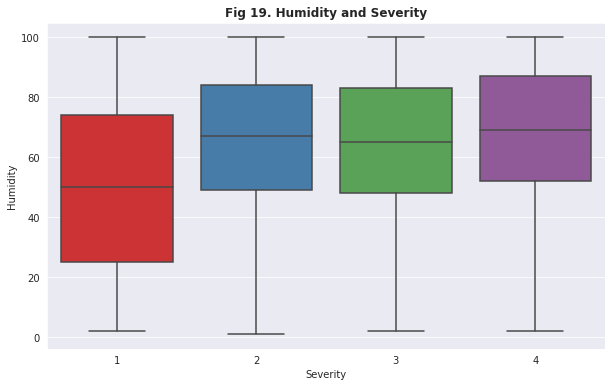

In [101]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x="Severity", y="Humidity(%)", data=data, palette="Set1")
ax.set(xlabel='Severity', ylabel='Humidity')
plt.title('Fig 19. Humidity and Severity', weight = 'bold')


We can see that higher humidity might lead to more severe accidents.

# What is the timezone to see highest number of accidents?

Text(0.5, 1.0, 'Fig 20. Timezone Vs No of Accidents')

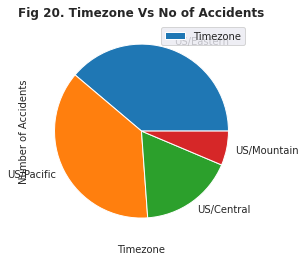

In [102]:
plt.figure(figsize = (6,4))
ax = data.Timezone.value_counts().plot(kind = 'pie')
ax.legend(['Timezone'])
plt.xlabel('Timezone')
plt.ylabel('Number of Accidents')
plt.title('Fig 20. Timezone Vs No of Accidents', weight = 'bold')

# Under each timezone, which level of severity was seen to have highest number of accidents?

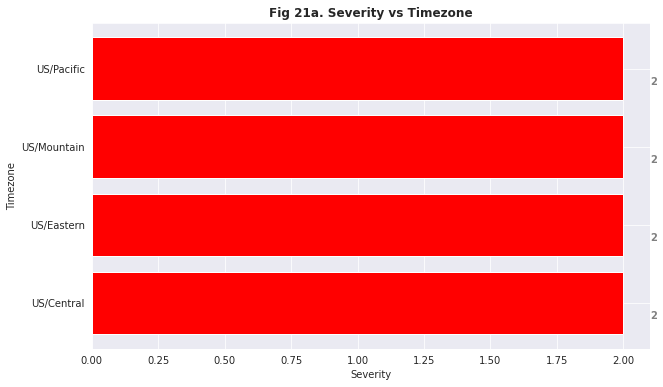

In [103]:
Ti_Se = data[['Timezone','Severity']].groupby(["Timezone",'Severity']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='Severity').sort_values(by='Severity',ascending=False)
y = Ti_Se['Timezone'].head(25)
x = Ti_Se['Severity'].head(25)
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(y, x, color = 'r') 
plt.title('Fig 21a. Severity vs Timezone', weight = 'bold')
plt.ylabel('Timezone')
plt.xlabel('Severity')
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

# Plotting different timezones with number of accidents in different level of severity 

Text(0.5, 0, 'Timezone')

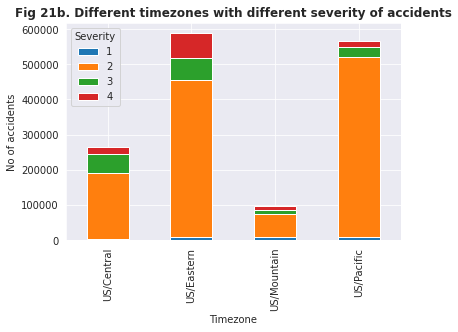

In [104]:
Ti_Se1 = data[['Timezone','Severity']].groupby(["Timezone",'Severity']).size()
#fig, ax = plt.subplots(figsize =(10, 6))
ax = Ti_Se1.unstack().plot(kind='bar', stacked=True)
plt.title('Fig 21b. Different timezones with different severity of accidents', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Timezone')

# Similar plot using scatterplot

Text(0.5, 0, 'Timezone')

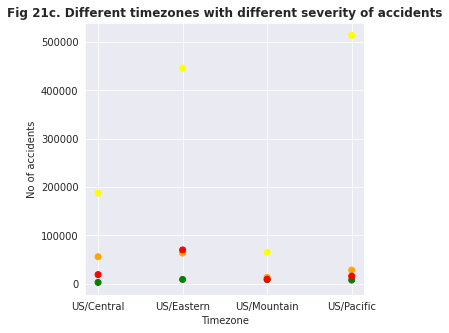

In [105]:
Ti_Se2 = data[['Timezone','Severity']].groupby(["Timezone",'Severity']).size().reset_index().rename(columns={0: 'Count'})
Ti_Se2
def recode_severity(sev):
    if sev == 1:
        return 'green'
    elif sev == 2:
        return 'yellow'
    elif sev == 3:
        return 'orange'
    else:
        return 'red'
    
    
Ti_Se2['Severity_col']=Ti_Se2['Severity'].apply(recode_severity)

fig = plt.figure(figsize=(5,5))
axes1 = fig.add_subplot(1,1,1)
axes1.scatter(x = Ti_Se2['Timezone'], y = Ti_Se2['Count'], c = Ti_Se2['Severity_col'])
plt.title('Fig 21c. Different timezones with different severity of accidents', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Timezone')

These graphs conclude that most of the accidents that were seen were in Eastern and Pacific timezone. But all the timezones have seen maximum number of accidents of severity 2.

# Which visibility range sees the highest number of accidents?

In [106]:
#Visibility: This records visibility at the time of the accident in miles. 
avg_visi = data['Visibility(mi)'].mean()
avg_visi

9.157074549623

Text(0.5, 0, 'Visibility on log scale')

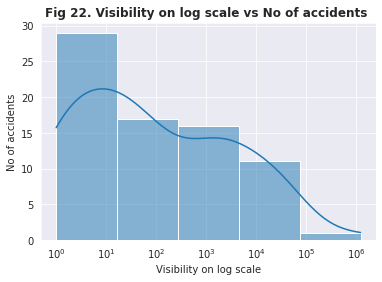

In [107]:
# he average comes at 9.13miles.
hist, ax = plt.subplots()
ax = sns.histplot(data['Visibility(mi)'].value_counts(), bins= 5, kde=True, log_scale=True)
ax.set_title('Fig 22. Visibility on log scale vs No of accidents ', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Visibility on log scale')

The majority of accidents happened when the visibility was between 1 to 10 miles. Typically, 10-mile visibility is used as a rule of thumb as a person should be able “to see and identify” in the daytime “a prominent dark object against the sky at the horizon” and at night “a known, preferably unfocused, moderately intense light source” that’s 10 miles away. There’s no definition of how tall the “prominent dark object” or the “light source” can be.
On the surface of things, visibility is not a strong enough reason for the accidents.

# Under different Visibility range, which level of severity of accident records the highest number of accidents?

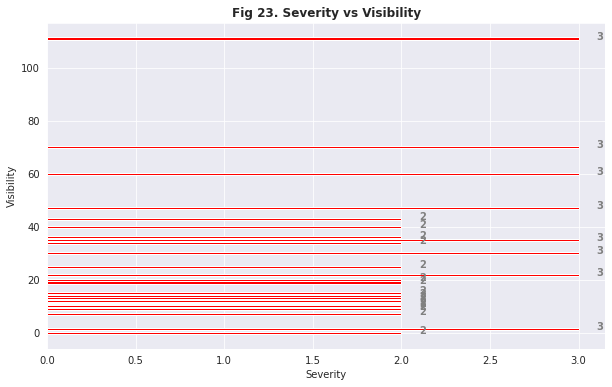

In [108]:
Vi_Se = data[['Visibility(mi)','Severity']].groupby(["Visibility(mi)",'Severity']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='Severity').sort_values(by='Severity',ascending=False)
y = Vi_Se['Visibility(mi)'].head(25)
x = Vi_Se['Severity'].head(25)
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(y, x, color = 'r') 
plt.title('Fig 23. Severity vs Visibility', weight = 'bold')
plt.ylabel('Visibility')
plt.xlabel('Severity')
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

# During the night, which level of severity of accidents was recorded the most? 

In [109]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
dt_hour = data['Start_Time'].dt.hour
dt_hour = pd.DataFrame(dt_hour)
dt_hour.rename(columns={'Start_Time':'Hour of Day'}, inplace=True)

In [110]:
dt_hour

,Hour of Day
0,0
1,5
2,6
3,6
4,6
...,...
1516059,18
1516060,19
1516061,19
1516062,19


In [111]:
dt_hour['Severity']=data['Severity']
dt_hour

,Hour of Day,Severity
0,0,3
1,5,2
2,6,2
3,6,2
4,6,2
...,...,...
1516059,18,2
1516060,19,2
1516061,19,2
1516062,19,2


# Which level of severity was recorded the most in each hour of the day?

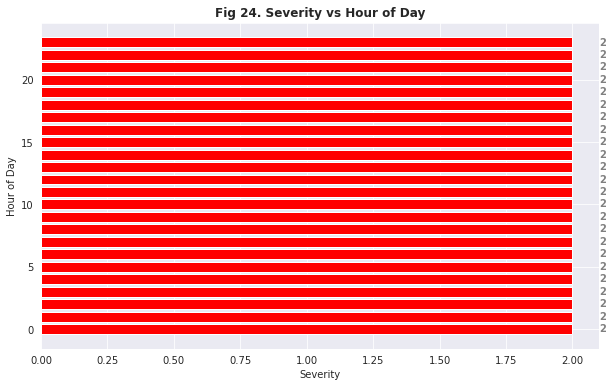

In [112]:
Ni_Se = dt_hour[['Hour of Day','Severity']].groupby(["Hour of Day",'Severity']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='Severity').sort_values(by='Severity',ascending=False)
y = Ni_Se['Hour of Day'].head(25)
x = Ni_Se['Severity'].head(25)
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(y, x, color = 'r') 
plt.title('Fig 24. Severity vs Hour of Day', weight = 'bold')
plt.ylabel('Hour of Day')
plt.xlabel('Severity')
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

# PLot showing different hour of day with number of accidents occuring with different level of severity

Text(0.5, 0, 'Hour of day')

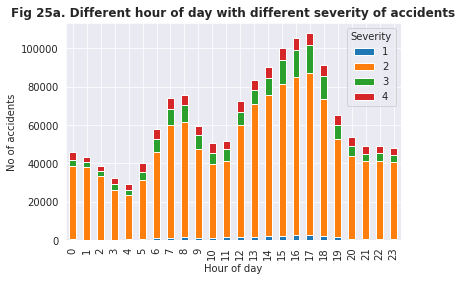

In [113]:
Ni_Se1 = dt_hour[['Hour of Day','Severity']].groupby(["Hour of Day",'Severity']).size()
ax = Ni_Se1.unstack().plot(kind='bar', stacked=True)
plt.title('Fig 25a. Different hour of day with different severity of accidents', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Hour of day')


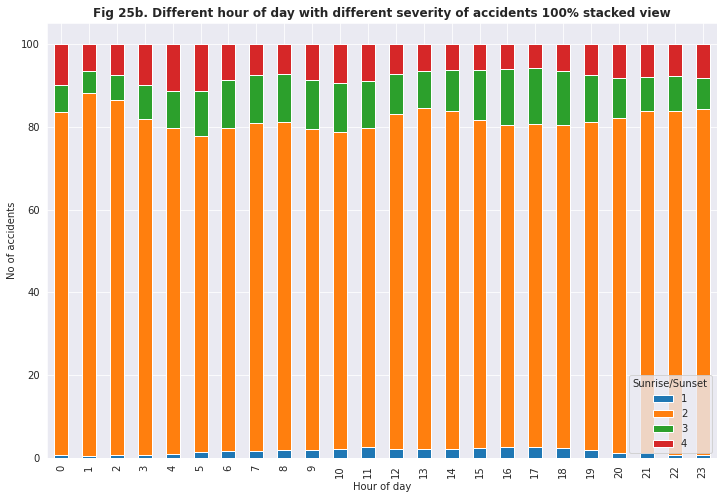

In [114]:
# Severity 1 and two has same % between day and night while 3 and 4 has more accidents % at nights
dt_hour[['Hour of Day','Severity']].groupby(["Hour of Day",'Severity']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(12,8))
plt.legend(loc = 'lower right',title = 'Sunrise/Sunset')
plt.title('Fig 25b. Different hour of day with different severity of accidents 100% stacked view', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Hour of day')
plt.show()


1. So most of the accidents that have occured during night are of severity 2.
2. Severity 1 and 2 has same % between day and night while 3 and 4 has more accidents % at nights



# Which side of road has most accidents recorded

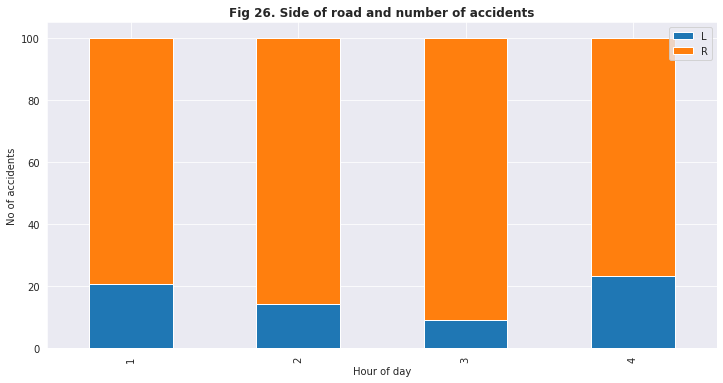

In [115]:
data[data.Side != " "].groupby(["Severity","Side"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(12,6))
plt.title('Fig 26. Side of road and number of accidents', weight = 'bold')
plt.ylabel('No of accidents')
plt.xlabel('Hour of day')
plt.legend(loc = 'upper right')
plt.show()

The plot below shows that most accidents are happening on the right side of the 
road



#Analysing Condition of road and impact on number of accidents

In [116]:
accident_road = data[['Severity','Amenity', 'Bump','Crossing','Give_Way',
                         'Junction','No_Exit','Railway','Roundabout','Station',
                         'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]
accident_road.head()

,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [117]:
accident_road_melt = pd.melt(accident_road,id_vars =['Severity'],value_vars=['Amenity', 'Bump','Crossing','Give_Way',
                         'Junction','No_Exit','Railway','Roundabout','Station',
                         'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop'])
group_road = accident_road_melt.groupby(["Severity","variable","value"]).agg(Count = ('value','count')).reset_index()
group_road.head()


,Severity,variable,value,Count
0,1,Amenity,False,27693
1,1,Amenity,True,485
2,1,Bump,False,28168
3,1,Bump,True,10
4,1,Crossing,False,19142


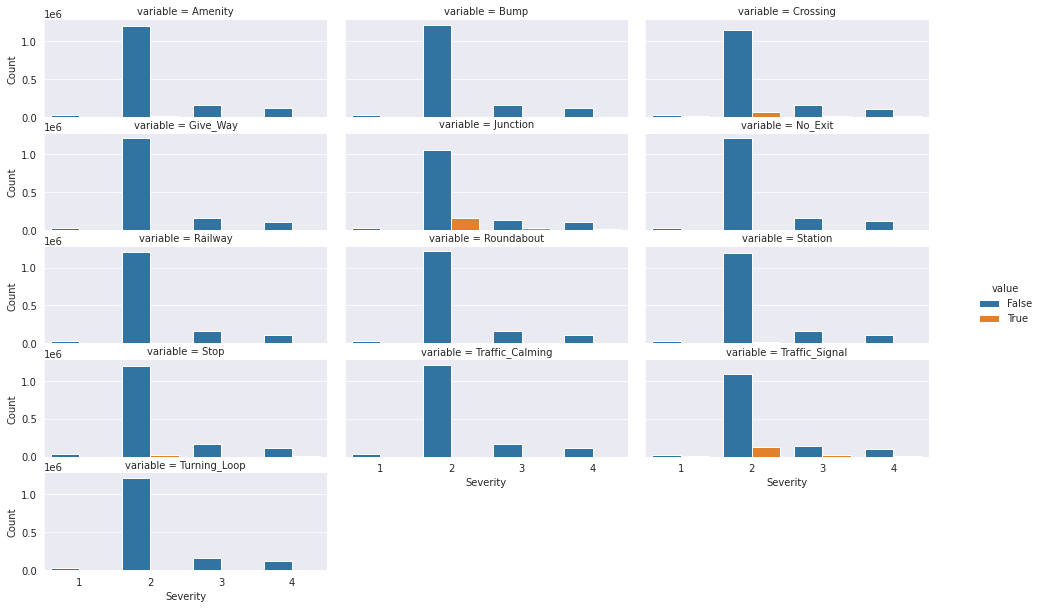

In [118]:
g = sns.catplot(x="Severity", y="Count", hue="value", col="variable",col_wrap=3, data=group_road, kind="bar", height=4, aspect=.7)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

From the plot, Corssing, Junction, Tracffic Signal have some impact on number of accidents.


In [119]:
from datetime import timedelta
from datetime import datetime
data.Start_Time = pd.to_datetime(data.Start_Time)
data.End_Time = pd.to_datetime(data.End_Time)
data["Time_Diff"] = (data.End_Time - data.Start_Time).astype('timedelta64[m]')

Text(0.5, 0, 'Severity')

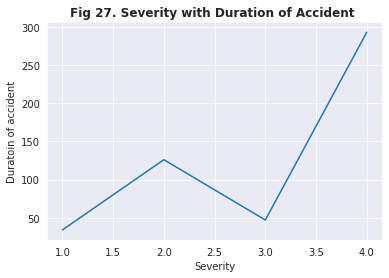

In [120]:
df1 = pd.DataFrame(data.groupby('Severity')['Time_Diff'].median()).reset_index()
x = df1['Severity']
y = df1['Time_Diff']
fig, ax = plt.subplots()
ax = plt.plot(x,y)
plt.title('Fig 27. Severity with Duration of Accident ', weight = 'bold')
plt.ylabel('Duratoin of accident')
plt.xlabel('Severity')


Text(0.5, 0, 'Severity')

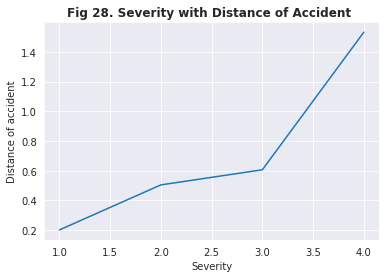

In [121]:
df2 = pd.DataFrame(data.groupby('Severity')['Distance(mi)'].mean()).reset_index()
x = df2['Severity']
y = df2['Distance(mi)']
fig, ax = plt.subplots()
ax = plt.plot(x,y)
plt.title('Fig 28. Severity with Distance of Accident ', weight = 'bold')
plt.ylabel('Distance of accident')
plt.xlabel('Severity')


As expected, more severe accidents will affect longer distances and last longer time.

## In each state, which county has recorded the highest number of accidents? 

In [122]:
Co_st = data.groupby(['State','County']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='County')
Co_st

,State,County
0,AL,Jefferson
1,AR,Pulaski
2,AZ,Maricopa
3,CA,Los Angeles
4,CO,Denver
5,CT,Hartford
6,DC,District of Columbia
7,DE,New Castle
8,FL,Miami-Dade
9,GA,Fulton


In [123]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Timezone,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Day,Hour,Year,Weekday,Time_Diff
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Outerbelt E,R,Dublin,Franklin,OH,US/Eastern,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,8,0,2016,0,360.0
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,I-70 E,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,8,5,2016,0,360.0
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,I-75 S,R,Cincinnati,Hamilton,OH,US/Eastern,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,8,6,2016,0,360.0
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,US-50 E,R,Cincinnati,Hamilton,OH,US/Eastern,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,8,6,2016,0,360.0
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,I-77 N,R,Akron,Summit,OH,US/Eastern,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,8,6,2016,0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,Pomona Fwy E,R,Riverside,Riverside,CA,US/Pacific,2019-08-23 17:53:00,86.0,40.0,28.92,10.0,W,13.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,23,18,2019,4,28.0
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,I-8 W,R,San Diego,San Diego,CA,US/Pacific,2019-08-23 18:53:00,70.0,73.0,29.39,10.0,SW,6.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,23,19,2019,4,26.0
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,Garden Grove Fwy,R,Orange,Orange,CA,US/Pacific,2019-08-23 18:53:00,73.0,64.0,29.74,10.0,SSW,10.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,23,19,2019,4,28.0
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,San Diego Fwy S,R,Culver City,Los Angeles,CA,US/Pacific,2019-08-23 18:51:00,71.0,81.0,29.62,10.0,SW,8.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,23,19,2019,4,29.0


#Data Modelling

After drawaing conclusions from the dataset, we will take only certain columns from the main dataset and perform the modelling in order to predict the severity of a given accident.

In [124]:
new_data = data[['County','City','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition','Severity']]

In [125]:
new_data

,County,City,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity
0,Franklin,Dublin,OH,US/Eastern,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,3
1,Montgomery,Dayton,OH,US/Eastern,36.9,91.0,29.68,10.0,CALM,7.0,Light Rain,2
2,Hamilton,Cincinnati,OH,US/Eastern,36.0,97.0,29.70,10.0,CALM,7.0,Overcast,2
3,Hamilton,Cincinnati,OH,US/Eastern,36.0,97.0,29.70,10.0,CALM,7.0,Overcast,2
4,Summit,Akron,OH,US/Eastern,39.0,55.0,29.65,10.0,CALM,7.0,Overcast,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,Riverside,Riverside,CA,US/Pacific,86.0,40.0,28.92,10.0,W,13.0,Fair,2
1516060,San Diego,San Diego,CA,US/Pacific,70.0,73.0,29.39,10.0,SW,6.0,Fair,2
1516061,Orange,Orange,CA,US/Pacific,73.0,64.0,29.74,10.0,SSW,10.0,Partly Cloudy,2
1516062,Los Angeles,Culver City,CA,US/Pacific,71.0,81.0,29.62,10.0,SW,8.0,Fair,2


We have decided to use the linear regression model for this dataset. As the Linear Regression model will take only integer inputs, we need to assign numberical labels for all the categorical values columns. We will be label encoding the following columns: 

1) County

2) City

3) State

4) Timezone

5) Wind_Direction

6) Weather_Condition



In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder() 
new_data['County'] = T.fit_transform(new_data['County'])
new_data['City'] = T.fit_transform(new_data['City'])
new_data['State'] = T.fit_transform(new_data['State'])
new_data['Timezone'] = T.fit_transform(new_data['Timezone'])
new_data['Wind_Direction'] = T.fit_transform(new_data['Wind_Direction'])
new_data['Weather_Condition'] = T.fit_transform(new_data['Weather_Condition'])


In [128]:
new_data

,County,City,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity
0,538,2554,33,1,42.1,58.0,29.76,10.0,13,10.4,49,3
1,1014,2296,33,1,36.9,91.0,29.68,10.0,0,7.0,49,2
2,642,1723,33,1,36.0,97.0,29.70,10.0,0,7.0,71,2
3,642,1723,33,1,36.0,97.0,29.70,10.0,0,7.0,71,2
4,1451,66,33,1,39.0,55.0,29.65,10.0,0,7.0,71,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1269,8064,3,3,86.0,40.0,28.92,10.0,15,13.0,12,2
1516060,1321,8406,3,3,70.0,73.0,29.39,10.0,13,6.0,12,2
1516061,1109,7057,3,3,73.0,64.0,29.74,10.0,12,10.0,73,2
1516062,879,2189,3,3,71.0,81.0,29.62,10.0,13,8.0,12,2


## Train and Test Split

Now, We will split our data into two sets: 

1) The train data : with the help of which we will train the model

2) The test data : on which we test our model

In [129]:
x = new_data.drop(['Severity'],axis = 1)

In [130]:
y = data['Severity']

In [131]:
x.shape

(1516064, 11)

In [132]:
y.shape

(1516064,)

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)

In [134]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

predicted = lr.fit( X_train,y_train)

print(predicted.coef_)
print(predicted.intercept_)

[-5.73724922e-05 -3.62339799e-06  8.64274143e-04 -7.74619156e-02
 -1.13155388e-04  2.22175423e-04  2.27923568e-02  2.71356751e-03
 -4.65313254e-04  2.63001532e-03  1.03089471e-03]
1.662478297867775


As we can see that after the label encoding some columns have smaller values and some have very large values, for the better working of our model we will be standardizing all the values in the dataset. 

In [135]:
#standardizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=new_data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(new_data[num_values1])
new_data[num_values1]=scaler.transform(new_data[num_values1])

After standardizing the values, we will fir the linear regression model to our data in the following way.

In [136]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

Now we will check the accuracy of the Linear Regression model. 

In [137]:
lr.score(X_test, y_test)*100

4.130375372319916

We will also cross check the accuracy with the Rsquare score. 

In [138]:
from sklearn.metrics import r2_score
preds = lr.predict(X_test)

r2_score(y_test, preds)*100

4.130375372319916

As we can see that the accuracy percentage is just above 4%, we can clearly tell that this is not the right model for the given dataset so we will consider fitting another regression model: Random Forest Regressor.

In [139]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

Now we will check the accuracy of the Random Forest Regressor model.

In [140]:
rfr.score(X_test,y_test)*100

37.983450675057306

As we can see that the accuracy of the Random Forest Regressor is significantly greater than the Linear Regression model. We can conclude that the Random Forest Regressor Model is the better model for this dataset. 

In [141]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
1041439,2,2.000000
1503271,2,2.010000
1238132,3,2.600000
527299,2,2.000000
34876,2,2.290000
...,...,...
402078,2,2.000000
1325478,2,2.716667
924641,3,2.666000
1491927,3,3.183333


By this analysis we can say that the Random Forest Regressor is the better Model for the US_accidents Dataset and we can achieve much better accuracy by adopting other methods such as one hot encoding and etc for categorical columns. 